In [1]:
import cv2 

img = cv2.imread('dataset/gatos/0.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

64 64 3 3


# Convolutional Neural Networks

# Importar Librerías

In [2]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import sys
print('sys.executable =', sys.executable)
print('Python version =', sys.version)

sys.executable = c:\Users\Sears\AppData\Local\Programs\Python\Python311\python.exe
Python version = 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [4]:
import sys
import subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow"])

0

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Added for Augmentation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Cargar set de Imágenes

In [6]:
import sys
print('sys.executable =', sys.executable)
print('Python version =', sys.version)

sys.executable = c:\Users\Sears\AppData\Local\Programs\Python\Python311\python.exe
Python version = 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [7]:
from skimage.transform import resize
dirname = os.path.join(os.getcwd(),'dataset')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            # Fix: Handle RGBA images (4 channels) by keeping only RGB
            if image.shape[2] == 4:
                image = image[:, :, :3]
             #  Convertir en RGB si es en escala de grises
            if len(image.shape) == 2:
                image = np.stack((image,) * 3, axis=-1)

            #  Redimensionar a 32x32 para todas las imágenes
            image = resize(image, (64, 64), anti_aliasing=True, preserve_range=True)

            images.append(image.astype(np.uint8))
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Users\Sears\Documents\Trabajos De IA\Proyecto-2\dataset\
c:\Users\Sears\Documents\Trabajos De IA\Proyecto-2\dataset\gatos 1
c:\Users\Sears\Documents\Trabajos De IA\Proyecto-2\dataset\hormigas 8000
c:\Users\Sears\Documents\Trabajos De IA\Proyecto-2\dataset\mariquitas 7633
c:\Users\Sears\Documents\Trabajos De IA\Proyecto-2\dataset\perros 8000
c:\Users\Sears\Documents\Trabajos De IA\Proyecto-2\dataset\tortugas 8000
Directorios leidos: 5
Imagenes en cada directorio [8001, 7633, 8000, 8000, 7997]
suma Total de imagenes en subdirs: 39631


# Creamos las etiquetas

In [8]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  39631


In [9]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 gatos
1 hormigas
2 mariquitas
3 perros
4 tortugas


In [10]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [11]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (31704, 64, 64, 3) (31704,)
Testing data shape :  (7927, 64, 64, 3) (7927,)


Text(0.5, 1.0, 'Ground Truth : 1')

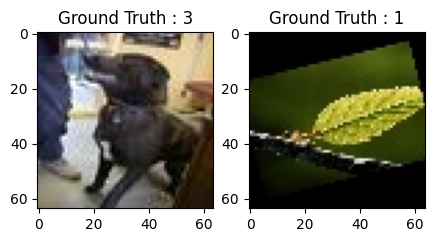

In [12]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

Text(0.5, 1.0, 'Visualización Correcta (Post-Procesamiento)')

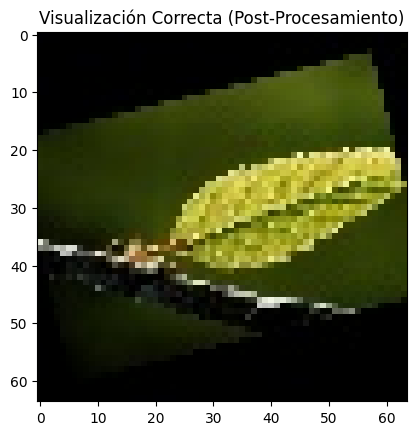

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# 1. Preprocess FIRST (Scales to [-1, 1])
train_X = preprocess_input(train_X)
test_X = preprocess_input(test_X)

# 2. Visualize AFTER (Rescale [-1, 1] -> [0, 1] for display)
# If we don't do this, values are wrong for imshow and it looks white
plt.imshow((test_X[0] + 1) / 2)
plt.title("Visualización Correcta (Post-Procesamiento)")

## Hacemos el One-hot Encoding para la red

In [14]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [15]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [16]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(25363, 64, 64, 3) (6341, 64, 64, 3) (25363, 5) (6341, 5)


# Creamos el modelo de CNN

In [17]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Aumentado para mejor convergencia
batch_size = 32 # Reducido para mejor generalización


In [ ]:
# Modelo CNN Profundo (4 Bloques) - Optimizado para Detalles Finos
# Arquitectura Secuencial 'Mini-VGG'

sport_model = Sequential()

# Bloque 1 (32 filtros) 
sport_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.25))

# Bloque 2 (64 filtros)
sport_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.25))

# Bloque 3 (128 filtros)
sport_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.4))

# Bloque 4 (256 filtros) - 
sport_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.4))

# Clasificación (Head Potente)
sport_model.add(Flatten())
sport_model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
sport_model.add(BatchNormalization())
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

sport_model.summary()

c:\Users\Sears\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441,477 (5.50 MB)

 Trainable params: 1,440,005 (5.49 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [19]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441,477 (5.50 MB)

 Trainable params: 1,440,005 (5.49 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [20]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR), metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [21]:
# Configurar Data Augmentation (Estándar - Alta Precisión)
# Revertido a la versión que funcionaba bien (sin deformación de color extrema)
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Callback para mejorar el aprendizaje si se estanca
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

print("Iniciando entrenamiento ESTÁNDAR (50 épocas + Augmentation Balanceado)...")
sport_train = sport_model.fit(
    datagen.flow(train_X, train_label, batch_size=batch_size),
    steps_per_epoch=len(train_X) // batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(valid_X, valid_label),
    callbacks=[reduce_lr]
)

Iniciando entrenamiento ESTÁNDAR (50 épocas + Augmentation Balanceado)...
Epoch 1/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 65s 78ms/step - accuracy: 0.5994 - loss: 1.5359 - val_accuracy: 0.6250 - val_loss: 1.3874 - learning_rate: 0.0010
Epoch 2/50
  1/792 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.5938 - loss: 1.2247

c:\Users\Sears\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5938 - loss: 1.2247 - val_accuracy: 0.6231 - val_loss: 1.4002 - learning_rate: 0.0010
Epoch 3/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 63s 79ms/step - accuracy: 0.6813 - loss: 1.0791 - val_accuracy: 0.5979 - val_loss: 1.3419 - learning_rate: 0.0010
Epoch 4/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7500 - loss: 0.9320 - val_accuracy: 0.6056 - val_loss: 1.3131 - learning_rate: 0.0010
Epoch 5/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 60s 75ms/step - accuracy: 0.7067 - loss: 0.9227 - val_accuracy: 0.6945 - val_loss: 0.9649 - learning_rate: 0.0010
Epoch 6/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8750 - loss: 0.6459 - val_accuracy: 0.6961 - val_loss: 0.9594 - learning_rate: 0.0010
Epoch 7/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 65s 82ms/step - accuracy: 0.7224 - loss: 0.8761 - val_accuracy: 0.7516 - val_loss: 0.8779 - learning_rate: 0.0010
Epoch 8/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8125 - loss: 0.8738 - val_a

In [22]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("animales.h5")

# Evaluamos la red

In [23]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8757 - loss: 0.3734


In [24]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.37341469526290894
Test accuracy: 0.8757411241531372


In [25]:
sport_train.history

{'accuracy': [0.5994236469268799,
  0.59375,
  0.6812995672225952,
  0.75,
  0.7066835165023804,
  0.875,
  0.7223954796791077,
  0.8125,
  0.742449939250946,
  0.75,
  0.7682286500930786,
  0.75,
  0.7806640267372131,
  0.75,
  0.7849275469779968,
  0.75,
  0.7907701730728149,
  0.875,
  0.7990604639053345,
  0.78125,
  0.8029686808586121,
  0.875,
  0.8062847852706909,
  0.9375,
  0.821128249168396,
  0.8125,
  0.8262208104133606,
  0.90625,
  0.8286289572715759,
  0.875,
  0.8355374932289124,
  0.90625,
  0.8388930559158325,
  0.84375,
  0.8450909852981567,
  0.84375,
  0.8456436991691589,
  0.90625,
  0.8506968021392822,
  0.90625,
  0.852789044380188,
  0.84375,
  0.8488413691520691,
  0.90625,
  0.8547629117965698,
  0.84375,
  0.8606845140457153,
  0.75,
  0.8583158850669861,
  1.0],
 'loss': [1.535932183265686,
  1.224652647972107,
  1.0790923833847046,
  0.9320447444915771,
  0.9227038025856018,
  0.6458600759506226,
  0.876086950302124,
  0.8737888336181641,
  0.8420618772506

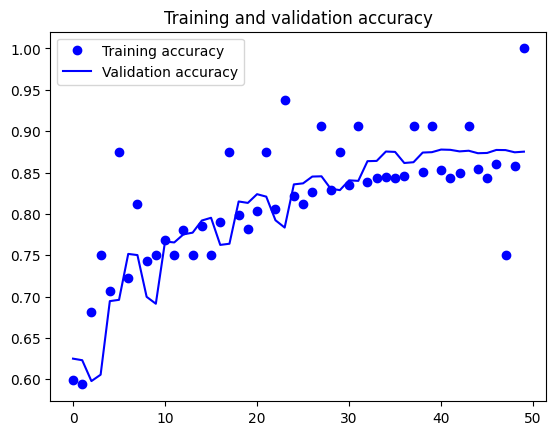

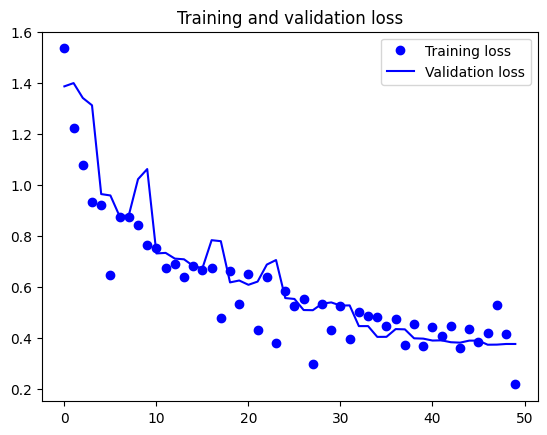

In [26]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
predicted_classes2 = sport_model.predict(test_X)

248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


In [28]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [29]:
predicted_classes.shape, test_Y.shape

((7927,), (7927,))

# Aprendamos de los errores: Qué mejorar

Found 6942 correct labels


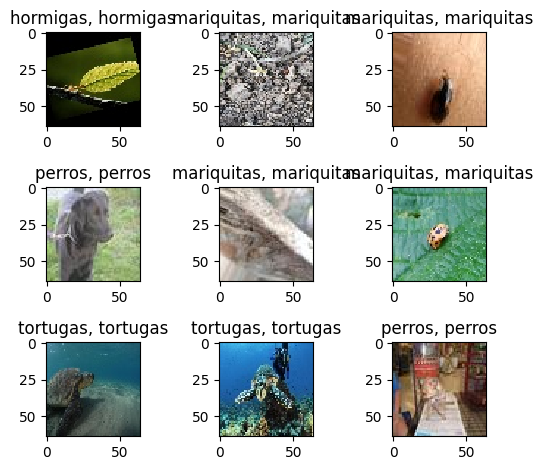

In [30]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow((test_X[correct] + 1) / 2, cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 985 incorrect labels


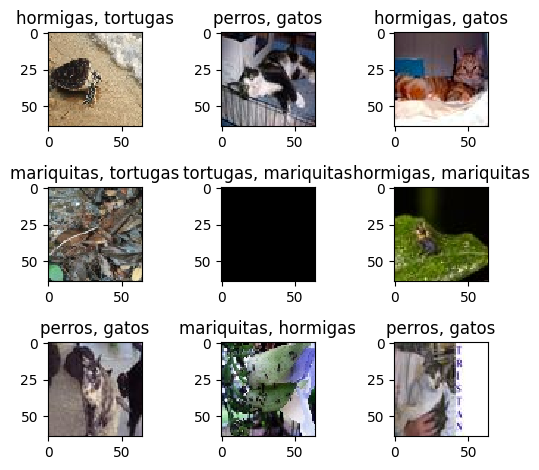

In [31]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow((test_X[incorrect] + 1) / 2, cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [32]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.90      0.70      0.79      1519
     Class 1       0.89      0.93      0.91      1495
     Class 2       0.91      0.91      0.91      1639
     Class 3       0.77      0.87      0.82      1602
     Class 4       0.91      0.96      0.94      1672

    accuracy                           0.88      7927
   macro avg       0.88      0.87      0.87      7927
weighted avg       0.88      0.88      0.87      7927



In [59]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['perro 1.jpg',
'perro 2.jpg', 
'perro 3.jpg',
'perro 4.jpg',
'perro 5.jpg'
]

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (64, 64),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
# test_X = test_X / 255.  
# Preprocess for MobileNetV2 (Scales to [-1, 1])
test_X = preprocess_input(test_X)

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
perro 1.jpg perros
perro 2.jpg perros
perro 3.jpg perros
perro 4.jpg perros
perro 5.jpg perros
